# Figura Artigo

In [185]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/diogo/programs/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [186]:
import numpy as np
import matplotlib.pyplot as plt
import obspy as op
import glob
import os
import fnmatch
import shutil
import matplotlib.gridspec as gridspec
from scipy import signal,stats,spatial,misc
from obspy.taup import TauPyModel
import time
from IPython import display
import matplotlib.gridspec as gridspec
from obspy.clients.fdsn import Client
from obspy.clients.iris import Client as OldIris_Client
from obspy.core.util import NamedTemporaryFile
from mpl_toolkits.basemap import Basemap
import matplotlib.mlab as mlab
import itertools
from obspy import UTCDateTime
from matplotlib.cbook import get_sample_data

In [187]:
STA = ['BPPF','BUCO','GENI','GRJU','PRDT','STSN','STSR','TRZN']

BPPF = 0 ,BUCO = 1, GENI = 2, GRJU = 3, PRDT = 4, STSN = 5, STSR = 6, TRZN = 7

In [188]:
z = 0

In [189]:
os.chdir('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z])
os.system('sac2xy 2 model.0.vs > model_0_vs.txt')
os.system('sac2xy 2 model.9.vs > model_9_vs.txt')
os.system('sac2xy 2 syn.9ur.disp > syn_9ur.txt')
os.system('sac2xy 2 urayl.sac > urayl.txt')


os.chdir('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z])
os.system('sac2xy 2 model.0.vs > model_0_vs.txt')
os.system('sac2xy 2 model.9.vs > model_9_vs.txt')
os.system('sac2xy 2 syn.9ur.disp > syn_9ur.txt')
os.system('sac2xy 2 urayl.sac > urayl.txt')

0

In [190]:
model_joint_0_1 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/model_0_vs.txt')
model_joint_1 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/model_9_vs.txt')

model_joint_0_25 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z]+'/model_0_vs.txt')
model_joint_25 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z]+'/model_9_vs.txt')

In [191]:
vs_1 = []
prof_1 = []
for i,j in enumerate(model_joint_1):
    vs_1.append(j[0])
    prof_1.append((-1)*(j[1]))

vs_0_1 = []
prof_0_1 = []
for i,j in enumerate(model_joint_0_1):
    vs_0_1.append(j[0])
    prof_0_1.append((-1)*(j[1]))
    
vs_25 = []
prof_25 = []
for i,j in enumerate(model_joint_25):
    vs_25.append(j[0])
    prof_25.append((-1)*(j[1]))

vs_0_25 = []
prof_0_25 = []
for i,j in enumerate(model_joint_0_25):
    vs_0_25.append(j[0])
    prof_0_25.append((-1)*(j[1]))

In [192]:
RF_0_1 = op.read('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/*eqr')
RF_1 = op.read('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/syn.9.rftn')

RF_0_25 = op.read('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z]+'/*eqr')
RF_25 = op.read('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z]+'/syn.9.rftn')

In [193]:
group_ray_periods_0_1 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/urayl.txt')[:,0]
group_ray_0_1 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/urayl.txt')[:,1]

group_ray_periods_1 =  np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/syn_9ur.txt')[:,0]
group_ray_1 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/syn_9ur.txt')[:,1]


group_ray_periods_0_25 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z]+'/urayl.txt')[:,0]
group_ray_0_25 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z]+'/urayl.txt')[:,1]

group_ray_periods_25 =  np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z]+'/syn_9ur.txt')[:,0]
group_ray_25 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z]+'/syn_9ur.txt')[:,1]

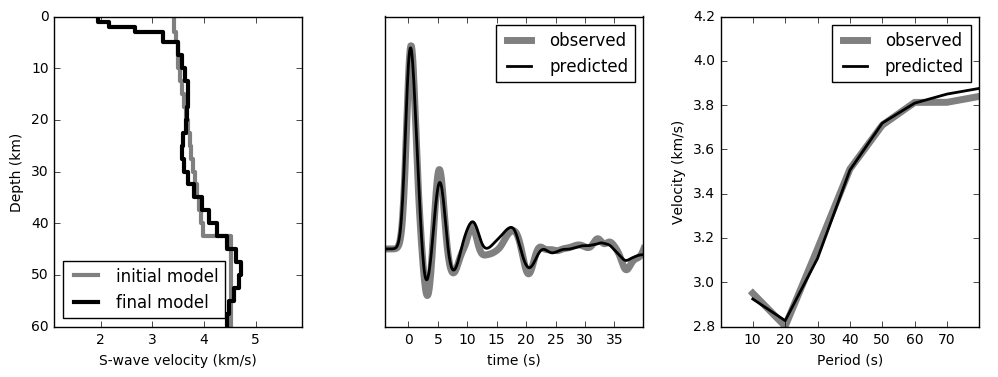

In [194]:
fig = plt.figure(figsize = (12,4),facecolor='white')

gs1 = gridspec.GridSpec(1,3)
gs1.update(wspace=0.3, hspace=0.5)

ax1 = plt.subplot(gs1[0])
ax1.step(vs_0_1,prof_0_1,'grey',lw= 3, where='post',label='initial model')
ax1.step(vs_1,prof_1,'k',lw= 3, where='post',label='final model')
ax1.set_ylabel('Depth (km)')
ax1.legend()
ax1.set_xlim([1.1,5.9])
ax1.set_xlabel('S-wave velocity (km/s)')
ax1.set_ylim([60,0])
ax1.set_aspect(0.1)
ax1.legend(loc=3)


ax3 = plt.subplot(gs1[1])
ax3.plot(RF_0_1[0].times()-10,RF_0_1[0].data,'grey',lw=5,label='observed')
ax3.plot(RF_1[0].times()-10,RF_1[0].data,'k',lw=2,label='predicted')
ax3.set_xlim(-4,39.9)
ax3.set_xlabel('time (s)')
ax3.set_yticks([])
ax3.legend(loc=0)


ax5 = plt.subplot(gs1[2])
ax5.plot(group_ray_periods_0_1,group_ray_0_1,'grey',lw=5,label='observed')
ax5.plot(group_ray_periods_1,group_ray_1,'k',lw=2,label='predicted')
ax5.set_xlabel('Period (s)')
ax5.set_ylabel('Velocity (km/s)')   
ax5.set_xlim(0.1,79.9)
ax5.legend(loc=0)
fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/joint_inversion.png')

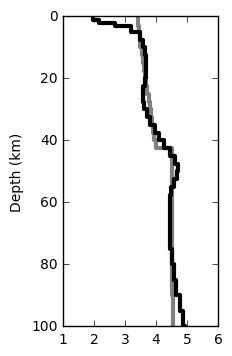

In [195]:
fig = plt.figure(figsize = (4,4))

gs1 = gridspec.GridSpec(1,1)
gs1.update(wspace=0.5, hspace=1)

ax1 = plt.subplot(gs1[0])
ax1.step(vs_0_1,prof_0_1,'grey',lw= 3, where='post')
ax1.step(vs_1,prof_1,'k',lw= 3, where='post')
ax1.set_ylabel('Depth (km)')
ax1.set_xlim([1,6])
ax1.set_ylim([100,0])
ax1.set_aspect(0.1)
fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_1.0/'+STA[z]+'/velocity_model.svg')

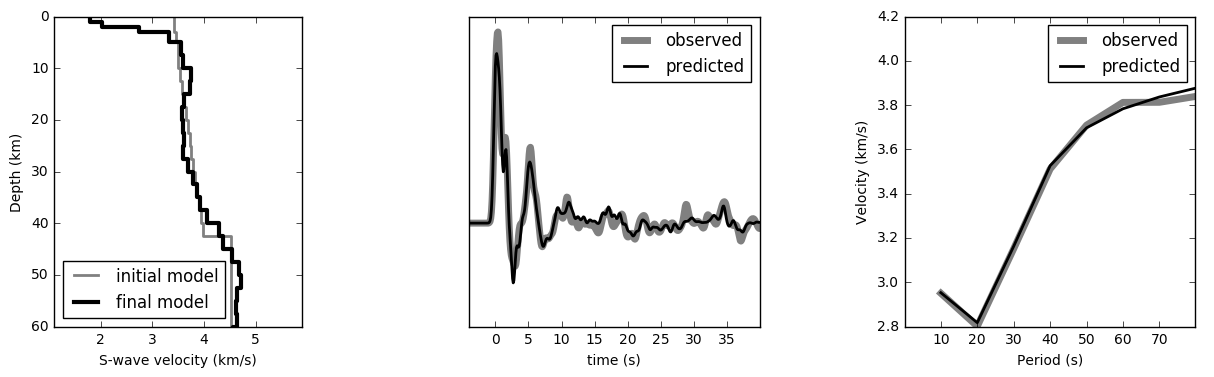

In [196]:
fig = plt.figure(figsize = (15,4),facecolor='white')

gs1 = gridspec.GridSpec(1,3)
gs1.update(wspace=0.5, hspace=1)

ax2 = plt.subplot(gs1[0,0])
ax2.step(vs_0_25,prof_0_25,'grey',lw= 2, where='post',label='initial model')
ax2.step(vs_25,prof_25,'k',lw= 3, where='post',label='final model')
ax2.set_ylabel('Depth (km)')
ax2.set_xlabel('S-wave velocity (km/s)')
ax2.legend()
ax2.set_xlim([1.1,5.9])
ax2.set_ylim([60,0])
ax2.set_aspect(0.1)
ax2.legend(loc=3)

ax4 = plt.subplot(gs1[0,1])
ax4.plot(RF_0_25[0].times()-10,RF_0_25[0].data,'grey',lw=5,label='observed')
ax4.plot(RF_25[0].times()-10,RF_25[0].data,'k',lw=2,label='predicted')
ax4.set_xlim(-4,39.9)
ax4.set_xlabel('time (s)')
ax4.set_yticks([])
ax4.legend(loc=0)

ax6 = plt.subplot(gs1[0,2])
ax6.plot(group_ray_periods_0_25,group_ray_0_25,'grey',lw=5, label='observed')
ax6.plot(group_ray_periods_25,group_ray_25,'k',lw=2,label='predicted')
ax6.set_xlabel('Period (s)')
ax6.set_ylabel('Velocity (km/s)')   
ax6.set_xlim(0.1,79.9)
ax6.legend(loc=0)
fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z]+'/joint_inversion.png')

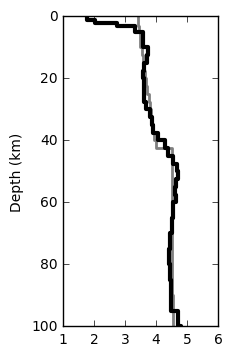

In [197]:
fig = plt.figure(figsize = (4,4))

gs1 = gridspec.GridSpec(1,1)
gs1.update(wspace=0.5, hspace=1)

ax2 = plt.subplot(gs1[0,0])
ax2.step(vs_0_25,prof_0_25,'grey',lw= 2, where='post')
ax2.step(vs_25,prof_25,'k',lw= 3, where='post')
ax2.set_ylabel('Depth (km)')
ax2.set_xlim([1,6])
ax2.set_ylim([100,0])
ax2.set_aspect(0.1)
fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/joint_inversion/gcarc_30_2.5/'+STA[z]+'/velocity_model.svg')

In [198]:
STA1 = 'BDCO'

In [199]:
os.chdir('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0/'+STA1)
os.system('sac2xy 2 model.0.vs > model_0_vs.txt')
os.system('sac2xy 2 model.9.vs > model_9_vs.txt')
os.system('sac2xy 2 syn.9ur.disp > syn_9ur.txt')
os.system('sac2xy 2 urayl.sac > urayl.txt')


os.chdir('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_2.5/'+STA1)
os.system('sac2xy 2 model.0.vs > model_0_vs.txt')
os.system('sac2xy 2 model.9.vs > model_9_vs.txt')
os.system('sac2xy 2 syn.9ur.disp > syn_9ur.txt')
os.system('sac2xy 2 urayl.sac > urayl.txt')

0

In [200]:
model_joint_0_1 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0/'+STA1+'/model_0_vs.txt')
model_joint_1 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0/'+STA1+'/model_9_vs.txt')

model_joint_0_25 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_2.5/'+STA1+'/model_0_vs.txt')
model_joint_25 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_2.5/'+STA1+'/model_9_vs.txt')

In [201]:
vs_1 = []
prof_1 = []
for i,j in enumerate(model_joint_1):
    vs_1.append(j[0])
    prof_1.append((-1)*(j[1]))

vs_0_1 = []
prof_0_1 = []
for i,j in enumerate(model_joint_0_1):
    vs_0_1.append(j[0])
    prof_0_1.append((-1)*(j[1]))
    
vs_25 = []
prof_25 = []
for i,j in enumerate(model_joint_25):
    vs_25.append(j[0])
    prof_25.append((-1)*(j[1]))

vs_0_25 = []
prof_0_25 = []
for i,j in enumerate(model_joint_0_25):
    vs_0_25.append(j[0])
    prof_0_25.append((-1)*(j[1]))

In [202]:
RF_0_1 = op.read('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0/'+STA1+'/*eqr')
RF_1 = op.read('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0/'+STA1+'/syn.9.rftn')

RF_0_25 = op.read('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_2.5/'+STA1+'/*eqr')
RF_25 = op.read('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_2.5/'+STA1+'/syn.9.rftn')

In [203]:
group_ray_periods_0_1 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0/'+STA1+'/urayl.txt')[:,0]
group_ray_0_1 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0/'+STA1+'/urayl.txt')[:,1]

group_ray_periods_1 =  np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0/'+STA1+'/syn_9ur.txt')[:,0]
group_ray_1 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0/'+STA1+'/syn_9ur.txt')[:,1]


group_ray_periods_0_25 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_2.5/'+STA1+'/urayl.txt')[:,0]
group_ray_0_25 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_2.5/'+STA1+'/urayl.txt')[:,1]

group_ray_periods_25 =  np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_2.5/'+STA1+'/syn_9ur.txt')[:,0]
group_ray_25 = np.genfromtxt('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_2.5/'+STA1+'/syn_9ur.txt')[:,1]

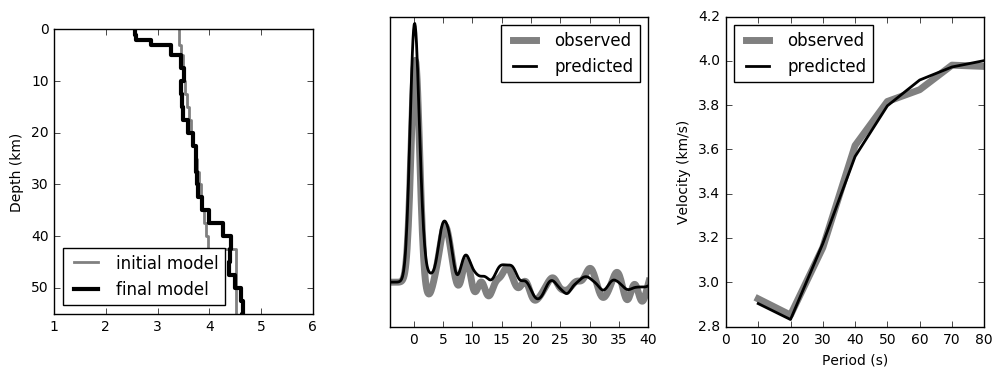

In [204]:
fig = plt.figure(figsize = (12,4),facecolor='white')

gs1 = gridspec.GridSpec(1,3)
gs1.update(wspace=0.3, hspace=0.5)

ax1 = plt.subplot(gs1[0])
ax1.step(vs_0_1,prof_0_1,'grey',lw= 2, where='post',label='initial model')
ax1.step(vs_1,prof_1,'k',lw= 3, where='post',label='final model')
ax1.set_ylabel('Depth (km)')
ax1.legend()
ax1.set_xlim([1,6])
ax1.set_ylim([55,0])
ax1.set_aspect(0.1)
ax1.legend(loc=3)


ax3 = plt.subplot(gs1[1])
ax3.plot(RF_0_1[0].times()-10,RF_0_1[0].data,'grey',lw=5,label='observed')
ax3.plot(RF_1[0].times()-10,RF_1[0].data,'k',lw=2,label='predicted')
ax3.set_xlim(-4,40)
ax3.set_yticks([])
ax3.legend(loc=0)


ax5 = plt.subplot(gs1[2])
ax5.plot(group_ray_periods_0_1,group_ray_0_1,'grey',lw=5,label='observed')
ax5.plot(group_ray_periods_1,group_ray_1,'k',lw=2,label='predicted')
ax5.set_xlabel('Period (s)')
ax5.set_ylabel('Velocity (km/s)')   
ax5.set_xlim(0,80)
ax5.legend(loc=0)
fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0/'+STA1+'/joint_inversion.png')

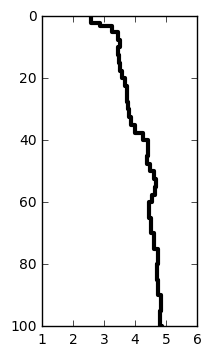

In [205]:
fig = plt.figure(figsize = (4,4))

gs1 = gridspec.GridSpec(1,1)
gs1.update(wspace=0.5, hspace=1)

ax1 = plt.subplot(gs1[0])
ax1.step(vs_1,prof_1,'k',lw= 3, where='post')
ax1.set_xlim([1,6])
ax1.set_ylim([100,0])
ax1.set_aspect(0.1)
fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_1.0/'+STA1+'/velocity_model.svg')

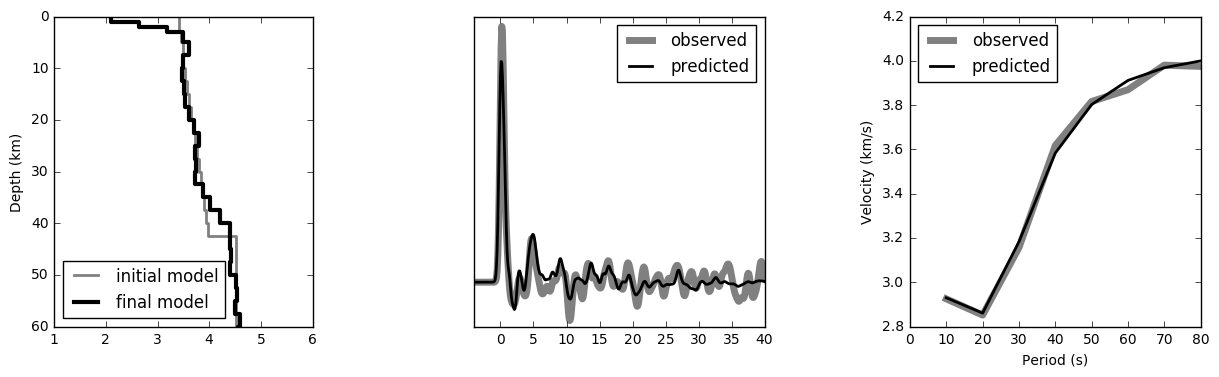

In [206]:
fig = plt.figure(figsize = (15,4),facecolor='white')

gs1 = gridspec.GridSpec(1,3)
gs1.update(wspace=0.5, hspace=1)

ax2 = plt.subplot(gs1[0,0])
ax2.step(vs_0_25,prof_0_25,'grey',lw= 2, where='post',label='initial model')
ax2.step(vs_25,prof_25,'k',lw= 3, where='post',label='final model')
ax2.set_ylabel('Depth (km)')
ax2.legend()
ax2.set_xlim([1,6])
ax2.set_ylim([60,0])
ax2.set_aspect(0.1)
ax2.legend(loc=3)

ax4 = plt.subplot(gs1[0,1])
ax4.plot(RF_0_25[0].times()-10,RF_0_25[0].data,'grey',lw=5,label='observed')
ax4.plot(RF_25[0].times()-10,RF_25[0].data,'k',lw=2,label='predicted')
ax4.set_xlim(-4,40)
ax4.set_yticks([])
ax4.legend(loc=0)

ax6 = plt.subplot(gs1[0,2])
ax6.plot(group_ray_periods_0_25,group_ray_0_25,'grey',lw=5, label='observed')
ax6.plot(group_ray_periods_25,group_ray_25,'k',lw=2,label='predicted')
ax6.set_xlabel('Period (s)')
ax6.set_ylabel('Velocity (km/s)')   
ax6.set_xlim(0,80)
ax6.legend(loc=0)
fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_2.5/'+STA1+'/joint_inversion.png')

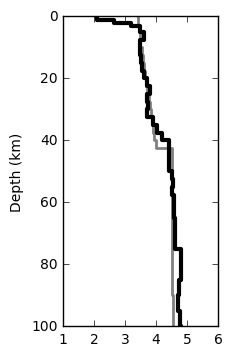

In [207]:
fig = plt.figure(figsize = (4,4))

gs1 = gridspec.GridSpec(1,1)
gs1.update(wspace=0.5, hspace=1)

ax2 = plt.subplot(gs1[0,0])
ax2.step(vs_0_25,prof_0_25,'grey',lw= 2, where='post')
ax2.step(vs_25,prof_25,'k',lw= 3, where='post')
ax2.set_ylabel('Depth (km)')
ax2.set_xlim([1,6])
ax2.set_ylim([100,0])
ax2.set_aspect(0.1)
fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-UK/joint_inversion/gcarc_30_2.5/'+STA1+'/velocity_model.svg')